## [Data Mining]  Exercise 4: Classification 

### 4.1.  Learning a classifier for the Iris Data Set – Part II Last exercise, you have learned lazy classification models for the Iris dataset. Now try a Decision Tree based approach with 10-fold cross-validation

#### 4.1.1        Discretise the Iris data set into three bins. Then use the DecisionTreeClassifier with a 10-fold stratified cross validation and compute the accuracy. Afterwards plot the decision tree.

In [133]:
#Import dataset
from sklearn import datasets
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

iris = datasets.load_iris(as_frame=True)
iris = iris['frame']

# copy original df
iris = iris.copy()

# X and y
iris_X = iris.iloc[:,:-1]
iris_y = iris['target']


display(iris.head(150));


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


0.9533333333333334


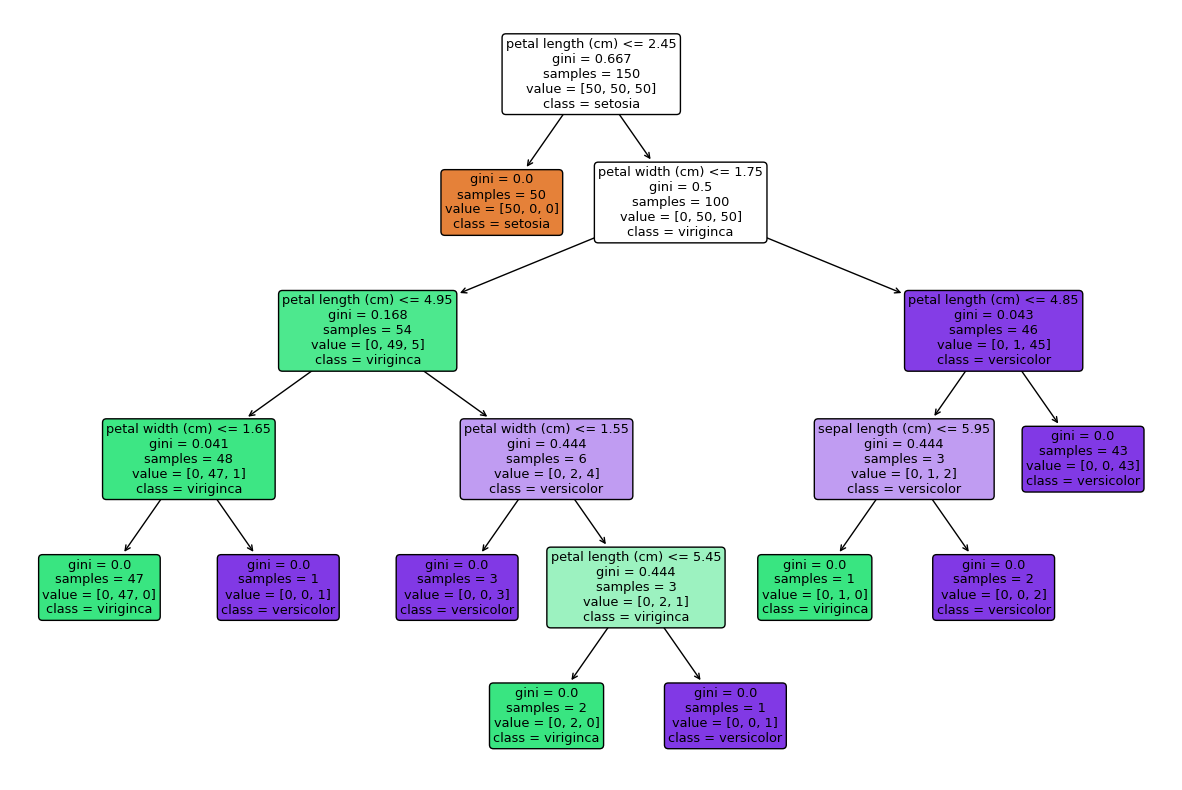

In [5]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict  
from sklearn import tree 

discretise = KBinsDiscretizer(n_bins = 3, encode = 'ordinal',strategy =  "quantile")
kfold = StratifiedKFold(n_splits = 10,shuffle = True, random_state= 42)
dt = DecisionTreeClassifier()

pipeline = Pipeline(steps = [('split',discretise),('decisontree', dt)])


accuracy_iris_dt = cross_val_score(pipeline,iris_X, iris_y, cv = kfold, scoring = 'accuracy')

print(accuracy_iris_dt.mean())

clf = pipeline.named_steps['decisontree'].fit(iris_X,iris_y)

# visualise the decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, filled= True, rounded= True,class_names=['setosia', 'viriginca', 'versicolor'], 
            feature_names= ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']);
plt.show()


#### 4.1.2        Remove the discretization and adjust the max_depth parameter of DecisionTreeClassifier to increase the accuracy. Does the accuracy change? Compare the complexity of the two models. Which model should be preferred according to Occam’s razor?


0.9466666666666667


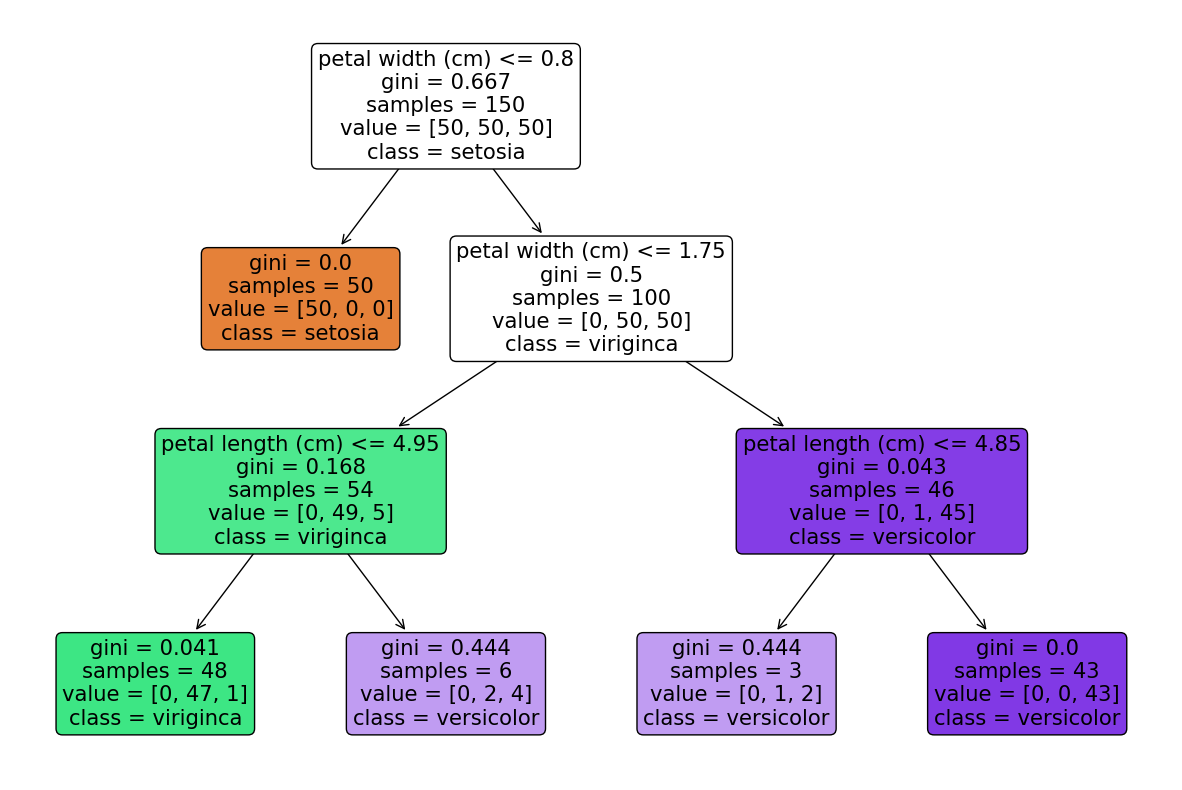

In [6]:

# remove discritizer and adjust max depth 

kfold = StratifiedKFold(n_splits = 10,shuffle = True, random_state= 42)
dt = DecisionTreeClassifier(max_depth= 3)

pipeline = Pipeline(steps = [('decisontree', dt)])


accuracy_iris_dt = cross_val_score(pipeline,iris_X, iris_y, cv = kfold, scoring = 'accuracy')

print(accuracy_iris_dt.mean())

clf = pipeline.named_steps['decisontree'].fit(iris_X,iris_y)

# visualise the decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, filled= True, rounded= True,class_names=['setosia', 'viriginca', 'versicolor'], 
            feature_names= ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']);

### 4.2 Who should get a bank credit? The German credit data set from the UCI data set library (http://archive.ics.uci.edu/ml/index.html) describes the customers of a bank with respect to whether they should get a bank credit or not. The data set is provided as credit-g.arff file in ILIAS.  

#### 4.2.1        Plot ROC curves for k-NN (different k values), Decision Tree and Naïve Bayes classification (you can use the given avg_roc function). Which classification approach looks most promising 

In [97]:
import pandas as pd
from scipy.io import arff

# Load ARFF file
data, meta = arff.loadarff('credit-g.arff')

# Convert to DataFrame
df = pd.DataFrame(data)

#select all columns of type objects
columns_with_binary_string = df.select_dtypes('object').columns.values

#decode the values of these columns with utf-8
df[columns_with_binary_string] = df[columns_with_binary_string].apply(lambda x: x.str.decode('utf-8'))

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

X  = df.iloc[:,:-1]
y = df['class']

#encoding
label_encoder = LabelEncoder()
numerical_features = ['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']
numeric_transformer = Pipeline(steps = [('scaler',StandardScaler())])

categorical_features = ['credit_history','purpose','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job']
categorical_transformer = Pipeline(steps = [('onehot',OneHotEncoder())])

ordinal_features = ['checking_status','savings_status','employment','own_telephone','foreign_worker']
ordinal_transformer = Pipeline(steps = [('ordinal',OrdinalEncoder())])


preprocessor = ColumnTransformer(transformers= [ ('num',numeric_transformer,numerical_features),
                                                 ('cat',categorical_transformer,categorical_features),
                                                 ('ordinal',ordinal_transformer,ordinal_features)])

#checking the preprocessing 
preprocessed = pd.DataFrame(preprocessor.fit_transform(X))
display(preprocessed.head())


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,4.0,3.0,1.0,1.0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,0.0,1.0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0


In [98]:

# model
dt = DecisionTreeClassifier(max_depth= 3)
knn = KNeighborsClassifier(n_neighbors=3)
NB = GaussianNB()

# Pipelines
pipeline_dt = Pipeline([('preprocessor', preprocessor), ('dt', dt)])
pipeline_knn = Pipeline([('preprocessor', preprocessor), ('knn', knn)])
pipeline_NB = Pipeline([('preprocessor', preprocessor), ('NB', NB)])

# Stratified kfold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Crossfold validation
accuracy_dt = cross_val_score(pipeline_dt, X, y, cv=kfold, scoring='accuracy')
accuracy_knn = cross_val_score(pipeline_knn, X, y, cv=kfold, scoring='accuracy')
accuracy_NB = cross_val_score(pipeline_NB, X, y, cv=kfold, scoring='accuracy')

print("Decision Tree Accuracy:", accuracy_dt.mean())
print("KNN Accuracy:", accuracy_knn.mean())
print("Naive Bayes Accuracy:", accuracy_NB.mean())



Decision Tree Accuracy: 0.725
KNN Accuracy: 0.708
Naive Bayes Accuracy: 0.654


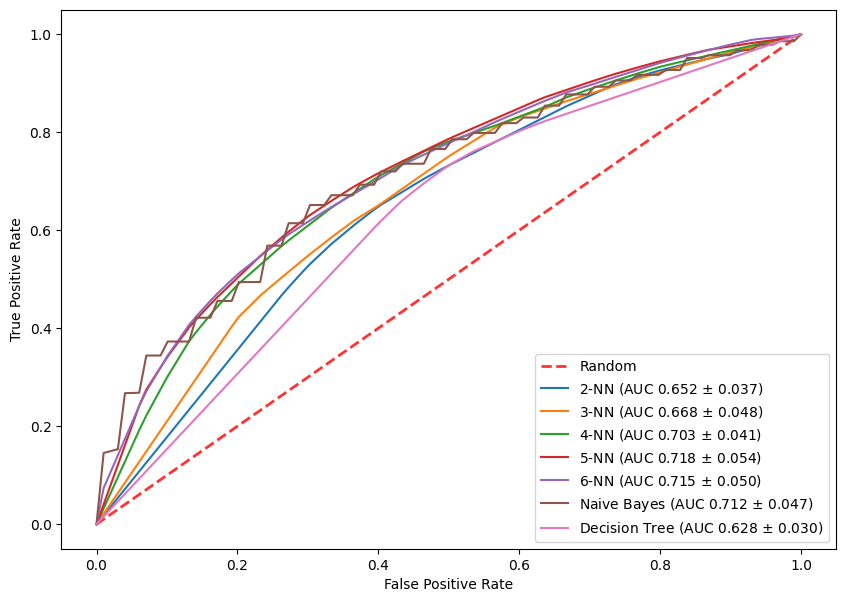

In [109]:
from numpy import interp
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def avg_roc(cv, estimator, data, target, pos_label):
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []    
    for train_indices, test_indices in cv.split(data, target):  # Corrected split indices
        train_data, train_target = data.iloc[train_indices], target.iloc[train_indices]  # Corrected indexing with iloc
        estimator.fit(train_data, train_target)
        
        test_data, test_target = data.iloc[test_indices], target.iloc[test_indices]  # Corrected indexing with iloc
        decision_for_each_class = estimator.predict_proba(test_data)
    
        fpr, tpr, thresholds = roc_curve(test_target, decision_for_each_class[:,1], pos_label=pos_label)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(auc(fpr, tpr))
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    return mean_fpr, mean_tpr, mean_auc, std_auc

# Specify how to create the folds for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create the pipeline
pipeline = Pipeline([('preprocessor', preprocessor), ('estimator', None)])

# Set up a figure
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# KNN
pipeline.set_params(estimator=KNeighborsClassifier())
for n_neighbors in [2, 3, 4, 5, 6]:
    pipeline.set_params(estimator=KNeighborsClassifier(n_neighbors))
    mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, X, y, 'good')
    plt.plot(mean_fpr, mean_tpr, label='{}-NN (AUC {:.3f} $\pm$ {:.3f})'.format(n_neighbors, mean_auc, std_auc))

# NB
pipeline.set_params(estimator=GaussianNB())
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, X, y, 'good')
plt.plot(mean_fpr, mean_tpr, label='Naive Bayes (AUC {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))


# DTT
pipeline.set_params(estimator=DecisionTreeClassifier())
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, X, y, 'good')
plt.plot(mean_fpr, mean_tpr, label='Decision Tree (AUC {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

# Show the plot
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


#### 4.2.2.	For the two most promising classification approaches, compute the accuracy and confusion matrix in a 10-fold CV setup. Which level of accuracy do you reach?

In [119]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

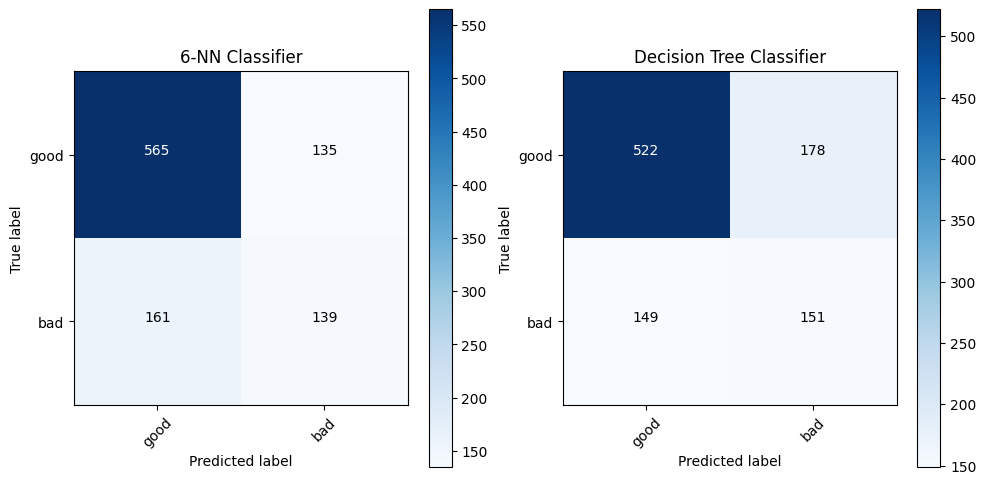

Classification Report for 6-NN Classifier:
              precision    recall  f1-score   support

         bad       0.51      0.46      0.48       300
        good       0.78      0.81      0.79       700

    accuracy                           0.70      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.70      0.70      0.70      1000

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

         bad       0.46      0.50      0.48       300
        good       0.78      0.75      0.76       700

    accuracy                           0.67      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.68      0.67      0.68      1000



In [124]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

plt.figure(figsize=(10,5))

classes = y.unique()

# KNN
plt.subplot(1,2,1)
pipeline.set_params(estimator=KNeighborsClassifier(6))
prediction = cross_val_predict(pipeline, X, y, cv=cv)
cnf_matrix = confusion_matrix(y, prediction, labels=classes)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='6-NN Classifier')
rep_knn = classification_report(y, prediction)

# Decision Tree
plt.subplot(1,2,2)
pipeline.set_params(estimator=DecisionTreeClassifier())
prediction = cross_val_predict(pipeline, X, y, cv=cv)
cnf_matrix = confusion_matrix(y, prediction, labels=classes)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='Decision Tree Classifier')
rep_dt = classification_report(y, prediction)

plt.show()

print("Classification Report for 6-NN Classifier:")
print(rep_knn)

print("Classification Report for Decision Tree Classifier:")
print(rep_dt)

#### 4.3.3        What do the precision and recall values for the class “bad” customer tell you? Try to improve the situation by increasing the number of “bad” customers in the training set (in the crossvalidation!). How do precision and recall change if you apply this procedure?

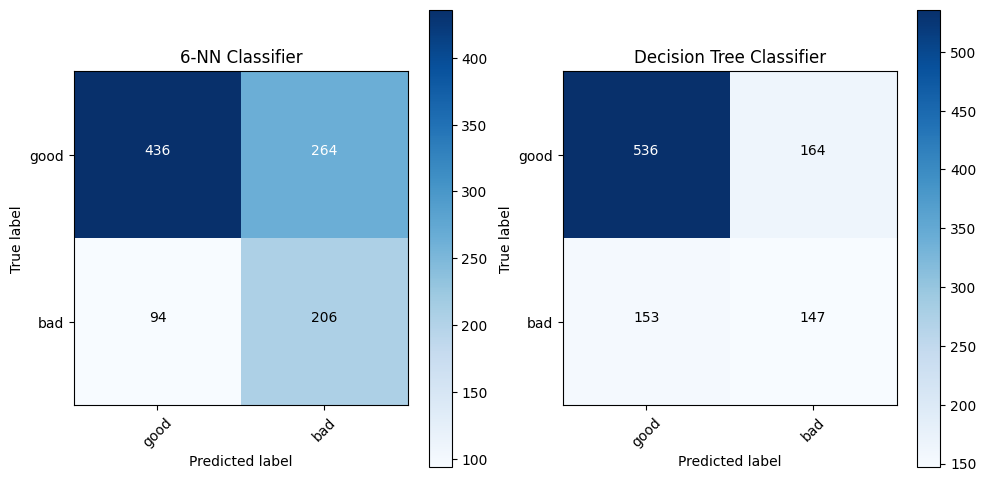

Classification Report for 6-NN Classifier:
              precision    recall  f1-score   support

         bad       0.44      0.69      0.54       300
        good       0.82      0.62      0.71       700

    accuracy                           0.64      1000
   macro avg       0.63      0.65      0.62      1000
weighted avg       0.71      0.64      0.66      1000

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

         bad       0.47      0.49      0.48       300
        good       0.78      0.77      0.77       700

    accuracy                           0.68      1000
   macro avg       0.63      0.63      0.63      1000
weighted avg       0.69      0.68      0.68      1000



In [126]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# create a new pipeline with balancing
pipeline = Pipeline([ ('preprocessing', preprocessor), ('balancing', RandomOverSampler()), ('estimator', None) ])

plt.figure(figsize=(10,5))

classes = y.unique()

# KNN
plt.subplot(1,2,1)
pipeline.set_params(estimator=KNeighborsClassifier(6))
prediction = cross_val_predict(pipeline, X, y, cv=cv)
cnf_matrix = confusion_matrix(y, prediction, labels=classes)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='6-NN Classifier')
rep_knn = classification_report(y, prediction)

# Decision Tree
plt.subplot(1,2,2)
pipeline.set_params(estimator=DecisionTreeClassifier())
prediction = cross_val_predict(pipeline, X, y, cv=cv)
cnf_matrix = confusion_matrix(y, prediction, labels=classes)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='Decision Tree Classifier')
rep_dt = classification_report(y, prediction)

plt.show()

print("Classification Report for 6-NN Classifier:")
print(rep_knn)

print("Classification Report for Decision Tree Classifier:")
print(rep_dt)

####  4.2.4.	To model a use case specific evaluation, compute the cost of all missclassifications. Set up your cost matrix by assuming that you will lose 1 Unit if you refuse a credit to a good customer, but that you lose 100 Units if you give a bad customer a credit. Rerun the experiments and evaluate the results.

In [128]:
pipeline.set_params(estimator=KNeighborsClassifier(6))
prediction = cross_val_predict(pipeline, X, y, cv=cv)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, prediction, labels=y.unique())
cost = cm[1][0] * 100 + cm[0][1] * 1
acc = accuracy_score(y, prediction)

print("6-NN with accuracy of {} and cost {}".format(acc, cost))

6-NN with accuracy of 0.643 and cost 9762


In [129]:
pipeline.set_params(estimator=DecisionTreeClassifier())


prediction = cross_val_predict(pipeline, X, y, cv=cv)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, prediction, labels=y.unique())
cost = cm[1][0] * 100 + cm[0][1] * 1
acc = accuracy_score(y, prediction)

print("DT accuracy of {} and cost {}".format(acc, cost))

DT accuracy of 0.668 and cost 16469


#### 4.2.5.	As the creation of training data is mostly a manual task and humans tend to be fallible, training data might include noise. Simulate this behavior by using the Add Noise function and change the parameter “percentage” from 0% over 10% to 20%. Is your preferred classification approach still feasible for this situation? How does the performance of the other classifiers evolve?

In [130]:
import random 
from sklearn.utils.multiclass import unique_labels
def add_noise(raw_target, percentage):    
    labels = unique_labels(raw_target)
    target_with_noise = []
    for one_target_label in raw_target:
        if random.randint(1,100) <= percentage:
            target_with_noise.append(next(l for l in labels if l != one_target_label))
        else:
            target_with_noise.append(one_target_label)
    return target_with_noise

In [132]:
for estimator in [DecisionTreeClassifier(), KNeighborsClassifier(6)]:
    for noise in [0,10,20, 30]:    
        all_test_target = []
        all_test_predition = []
        for train_indices, test_indices in cv.split(X, y):
            train_data, train_target = X.iloc[train_indices], y[train_indices]
            test_data, test_target = X.iloc[test_indices], y[test_indices]

            train_target = add_noise(train_target, noise)  
            pipeline.set_params(estimator=estimator)
            pipeline.fit(train_data, train_target)

            test_prediction = pipeline.predict(test_data)

            all_test_target.extend(test_target)
            all_test_predition.extend(test_prediction)
    
        print("estimator {} with {} % noise : {} accuracy".format(
            str(estimator).split("(", 1)[0], 
            noise, 
            accuracy_score(all_test_target, all_test_predition)))

estimator DecisionTreeClassifier with 0 % noise : 0.68 accuracy
estimator DecisionTreeClassifier with 10 % noise : 0.641 accuracy
estimator DecisionTreeClassifier with 20 % noise : 0.593 accuracy
estimator DecisionTreeClassifier with 30 % noise : 0.576 accuracy
estimator KNeighborsClassifier with 0 % noise : 0.642 accuracy
estimator KNeighborsClassifier with 10 % noise : 0.608 accuracy
estimator KNeighborsClassifier with 20 % noise : 0.56 accuracy
estimator KNeighborsClassifier with 30 % noise : 0.533 accuracy
